# Fraud Detection using Machine Learning
This notebook focuses on detecting fraudulent transactions using machine learning techniques.

## Steps Covered:
- Data Loading and Exploration
- Data Preprocessing
- Model Training and Evaluation

---

## 1. Load Necessary Libraries
We start by importing essential Python libraries for data manipulation, visualization, and model training.

## 2. Load and Explore the Dataset
We will load the dataset and perform an initial exploration to understand its structure.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Fraud.csv")

# Display first few rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 3. Data Overview
Let's check the dataset for missing values, column types, and statistical summaries.

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [9]:
print(df['isFraud'].value_counts(normalize=True) * 100)

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [11]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


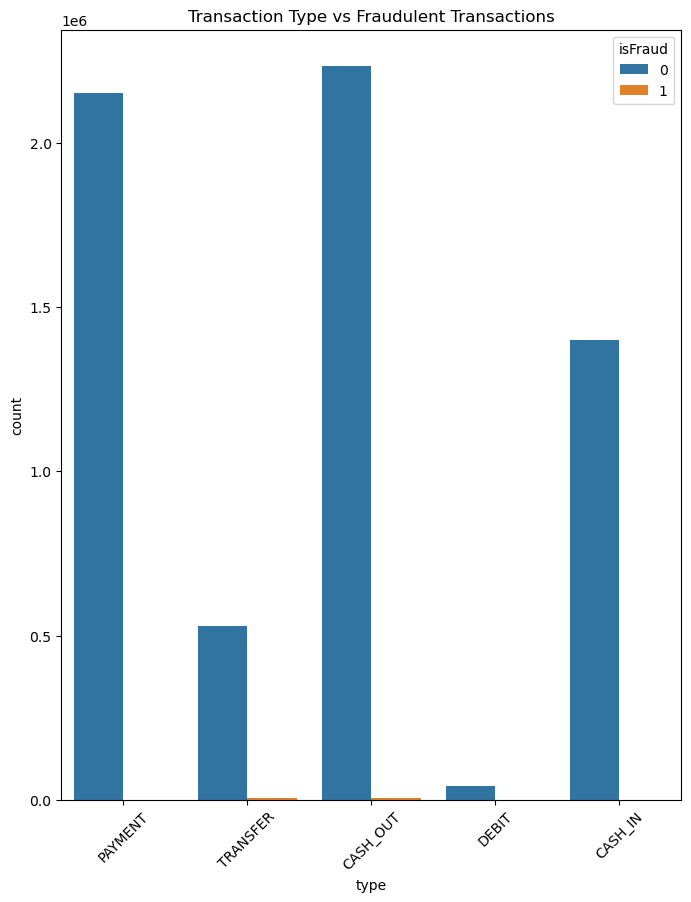

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title("Transaction Type vs Fraudulent Transactions")
plt.xticks(rotation=45)
plt.show()


In [15]:
# Perform one-hot encoding on 'type' column
df = pd.get_dummies(df, columns=['type'], drop_first=False)  

# Drop the original 'type' column (not needed since it's now one-hot encoded)
df.drop(columns=['type'], inplace=True, errors='ignore')  

df.head()


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,True,False


In [17]:
# Check if the original balance was 0 (possible fraud attempt)
df['zero_balanceOrig'] = (df['oldbalanceOrg'] == 0).astype(int)

# Check if the recipient's balance was 0 (possible fraudulent account)
df['zero_balanceDest'] = (df['oldbalanceDest'] == 0).astype(int)

# Difference between old and new balance
df['balanceChangeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Large Transactions (over 200,000)
df['largeTransaction'] = (df['amount'] > 200000).astype(int)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [21]:
df.drop_duplicates(inplace=True)

## 3. Data Overview
Let's check the dataset for missing values, column types, and statistical summaries.

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   amount             float64
 2   nameOrig           object 
 3   oldbalanceOrg      float64
 4   newbalanceOrig     float64
 5   nameDest           object 
 6   oldbalanceDest     float64
 7   newbalanceDest     float64
 8   isFraud            int64  
 9   isFlaggedFraud     int64  
 10  type_CASH_IN       bool   
 11  type_CASH_OUT      bool   
 12  type_DEBIT         bool   
 13  type_PAYMENT       bool   
 14  type_TRANSFER      bool   
 15  zero_balanceOrig   int32  
 16  zero_balanceDest   int32  
 17  balanceChangeOrig  float64
 18  balanceChangeDest  float64
 19  largeTransaction   int32  
dtypes: bool(5), float64(7), int32(3), int64(3), object(2)
memory usage: 685.7+ MB
None


In [25]:
# Create a flag if 'nameDest' has received fraud transactions before
df['destFraudCount'] = df.groupby('nameDest')['isFraud'].transform('sum')

# Create a flag if 'nameOrig' has sent fraud transactions before
df['origFraudCount'] = df.groupby('nameOrig')['isFraud'].transform('sum')

# Drop original non-numeric columns
df_encoded = df.drop(columns=['nameOrig', 'nameDest'])

## 4. Splitting the Data
We split the dataset into training and testing sets to evaluate the model properly.

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['isFraud'])  # Features
y = df_encoded['isFraud']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check fraud distribution
print("Before SMOTE:\n", y_train.value_counts(normalize=True))
print("\nAfter SMOTE:\n", y_train_smote.value_counts(normalize=True))


Before SMOTE:
 isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

After SMOTE:
 isFraud
0    0.666667
1    0.333333
Name: proportion, dtype: float64


## 5. Model Training
We train a machine learning model to classify transactions as fraudulent or non-fraudulent.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train Logistic Regression
lr_model = LogisticRegression(max_iter=500,random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
print("\n🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))



🔹 Logistic Regression Results:
Accuracy: 0.9999740672867466
Confusion Matrix:
 [[1270849      32]
 [      1    1642]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      1.00      0.99      1643

    accuracy                           1.00   1272524
   macro avg       0.99      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524

